In [1]:
from __future__ import print_function
from prefetch_generator import BackgroundGenerator, background,__doc__
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np

In [2]:
from tensorflow.keras.utils import to_categorical
import h5py







BATCH_SIZE = 1024
EPOCHS = 100
testpath='C:\\Users\\Kim\\Documents\\졸업_논문_자료\\data\\data\\test_2021-12-21-12_22.hdf5'

trainpath='C:\\Users\\Kim\\Documents\\졸업_논문_자료\\data\\data\\train_2021-12-21-12_20.hdf5'
filetest=h5py.File(testpath,'r')
filetrain=h5py.File(trainpath,'r')


testkeys=[]
filetest.visit(testkeys.append)

trainkeys=[]
filetrain.visit(trainkeys.append)

for i, testkey in enumerate(testkeys):
    print(i, testkey)
for i, trainkey in enumerate(trainkeys):
    print(i, trainkey)
x_train=filetrain[trainkeys[1]]##
y_train=filetrain[trainkeys[2]]##

x_test=filetest[testkeys[1]]
y_test=filetest[testkeys[2]]
y_test_cat=to_categorical(y_test,num_classes=3)


0 test
1 test/x
2 test/y
0 train
1 train/x
2 train/y


In [3]:

batch_s=4096

@background(max_prefetch=500)
def Hdf5_generator(X, y, batch_size):
    nsamples = len(X)
    start_idx = 0
    while True:
        if start_idx + batch_size > nsamples:
            start_idx = 0
        x_batch = X[start_idx:start_idx+batch_size, ...]
        y_batch = y[start_idx:start_idx+batch_size, ...]
        y_batch=to_categorical(y_batch,num_classes=3)
        start_idx += batch_size
        yield np.asarray(x_batch), np.asarray(y_batch)
        
        
def focal_loss(y_true, y_pred):
        import keras.backend as K
        gamma=2.0
        alpha=1.0

        epsilon = K.epsilon()

        y_pred = K.clip(y_pred, epsilon, 1.0-epsilon)

        cross_entropy = -y_true*K.log(y_pred)

        weight = alpha * y_true * K.pow((1-y_pred), gamma)

        loss = weight * cross_entropy

        loss = K.sum(loss, axis=1)
        return loss
        

   
        
        
training=Hdf5_generator(x_train, y_train, batch_s)
size=x_train.shape[0]
steps=size//batch_s
print(steps)

4251


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D



leaky_relu = tf.nn.leaky_relu

model = Sequential()
model.add(Dropout(0.2))
model.add(Conv1D(16,
	     3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(16))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')



In [6]:
import os
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.utils import to_categorical


class_weights ={0: 1.,
               1: 10.,
               2: 90.}


epochs = 35
verbosity =2

h5 = 'network.h5'
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
checkpoint = callbacks.ModelCheckpoint(h5,
                                       monitor='val_acc',
                                       verbose=1,
                                       save_best_only=True,
                                      save_weights_only=True,
                                      mode='max',
                                      period=1)

callback = [checkpoint]

history = model.fit(training,epochs=epochs,
                              steps_per_epoch=steps,

                              verbose=verbosity,
                              callbacks=[es,checkpoint])

model.summary()

Epoch 1/35
4251/4251 - 38s - loss: 0.2661 - accuracy: 0.9006 - 38s/epoch - 9ms/step
Epoch 2/35
4251/4251 - 40s - loss: 0.2478 - accuracy: 0.9064 - 40s/epoch - 10ms/step
Epoch 3/35
4251/4251 - 41s - loss: 0.2453 - accuracy: 0.9074 - 41s/epoch - 10ms/step
Epoch 4/35
4251/4251 - 40s - loss: 0.2439 - accuracy: 0.9079 - 40s/epoch - 10ms/step
Epoch 5/35
4251/4251 - 41s - loss: 0.2429 - accuracy: 0.9083 - 41s/epoch - 10ms/step
Epoch 6/35
4251/4251 - 41s - loss: 0.2421 - accuracy: 0.9086 - 41s/epoch - 10ms/step
Epoch 7/35
4251/4251 - 40s - loss: 0.2414 - accuracy: 0.9088 - 40s/epoch - 10ms/step
Epoch 8/35
4251/4251 - 40s - loss: 0.2407 - accuracy: 0.9090 - 40s/epoch - 10ms/step
Epoch 9/35
4251/4251 - 41s - loss: 0.2400 - accuracy: 0.9092 - 41s/epoch - 10ms/step
Epoch 10/35
4251/4251 - 41s - loss: 0.2396 - accuracy: 0.9093 - 41s/epoch - 10ms/step
Epoch 11/35
4251/4251 - 40s - loss: 0.2392 - accuracy: 0.9095 - 40s/epoch - 10ms/step
Epoch 12/35
4251/4251 - 40s - loss: 0.2389 - accuracy: 0.9096 - 

4251/4251 - 40s - loss: 0.2363 - accuracy: 0.9104 - 40s/epoch - 9ms/step
Epoch 29/35
4251/4251 - 40s - loss: 0.2362 - accuracy: 0.9105 - 40s/epoch - 9ms/step
Epoch 30/35
4251/4251 - 41s - loss: 0.2361 - accuracy: 0.9105 - 41s/epoch - 10ms/step
Epoch 31/35
4251/4251 - 40s - loss: 0.2361 - accuracy: 0.9105 - 40s/epoch - 10ms/step
Epoch 32/35
4251/4251 - 40s - loss: 0.2360 - accuracy: 0.9106 - 40s/epoch - 10ms/step
Epoch 33/35
4251/4251 - 40s - loss: 0.2359 - accuracy: 0.9106 - 40s/epoch - 10ms/step
Epoch 34/35
4251/4251 - 40s - loss: 0.2359 - accuracy: 0.9106 - 40s/epoch - 10ms/step
Epoch 35/35
4251/4251 - 40s - loss: 0.2358 - accuracy: 0.9106 - 40s/epoch - 10ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, None, None)        0         
                                                                 
 conv1d (Conv1D)             (None, None, 

In [7]:
model.save('bilstm_with_cnn.h5')

In [8]:
#testing=Hdf5_testgenerator(x_test, 1024)
y_test_cat=to_categorical(y_test,num_classes=3)
testing=Hdf5_generator(x_test, y_test_cat, batch_s)

In [9]:
size=x_test.shape[0]
steps=size//batch_s

print(size)
print(steps)
pred_test=model.predict_generator(testing,steps=steps)
pred_test.shape

1896626
463


C:\Users\Kim\AppData\Local\Temp\ipykernel_16884\4202106848.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_test=model.predict_generator(testing,steps=steps)


(1896448, 3)

In [10]:
from tensorflow.keras.utils import to_categorical
test_y=filetest[testkeys[2]]#test
test_y_cat = to_categorical(test_y,num_classes=3)#testy
test_y_cat.shape

(1896626, 3)

auc of 0: 0.8802492739556922
ap of 0: 0.9826445041656023
auc of 1: 0.9020931023828196
ap of 1: 0.5223423054968677
auc of 2: 0.9400791666337254
ap of 2: 0.22520414946660322


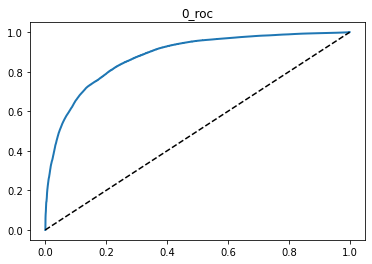

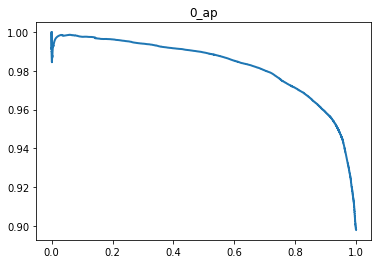

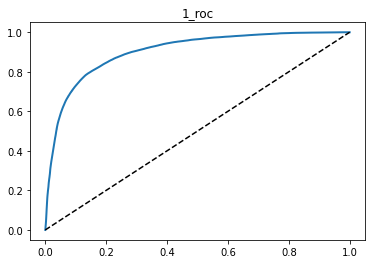

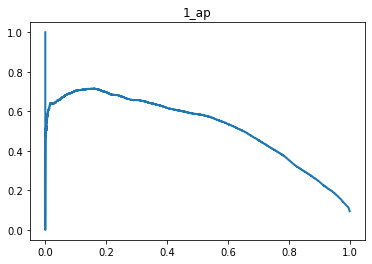

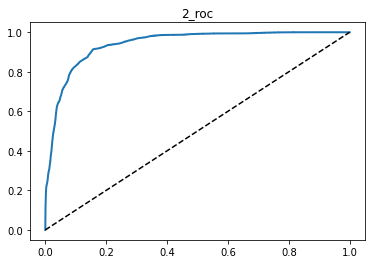

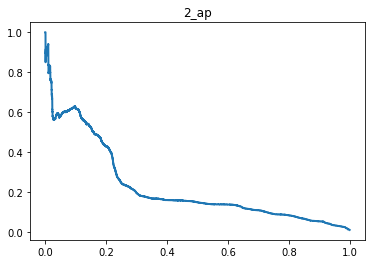

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score 
import matplotlib.pyplot as plt
fpr,tpr,threshold=roc_curve(y_test_cat[:steps*batch_s,0],pred_test[:,0])
precision,recall,thres =precision_recall_curve(y_test_cat[:steps*batch_s,0],pred_test[:,0])


plt.figure(4) 
plt.plot(fpr,tpr,linewidth=2) 
plt.plot([0,1],[0,1],'k--')
plt.title("0_roc")

plt.figure(3)
plt.plot(recall,precision,linewidth=2) 
plt.title("0_ap")


pp=roc_auc_score(y_test_cat[:steps*batch_s,0],pred_test[:,0])
ap=average_precision_score(y_test_cat[:steps*batch_s,0],pred_test[:,0])
print("auc of 0: "+str(pp))
print("ap of 0: "+str(ap))

fpr,tpr,threshold=roc_curve(y_test_cat[:steps*batch_s,1],pred_test[:,1])
precision,recall,thres =precision_recall_curve(y_test_cat[:steps*batch_s,1],pred_test[:,1])

plt.figure(5) 
plt.plot(fpr,tpr,linewidth=2) 
plt.plot([0,1],[0,1],'k--')
plt.title("1_roc")

plt.figure(2)
plt.plot(recall,precision,linewidth=2) 
plt.title("1_ap")

pp=roc_auc_score(y_test_cat[:steps*batch_s,1],pred_test[:,1])
ap=average_precision_score(y_test_cat[:steps*batch_s,1],pred_test[:,1])
print("auc of 1: "+str(pp))
print("ap of 1: "+str(ap))

fpr,tpr,threshold=roc_curve(y_test_cat[:steps*batch_s,2],pred_test[:,2])
precision,recall,thres =precision_recall_curve(y_test_cat[:steps*batch_s,2],pred_test[:,2])

plt.figure(6) 
plt.plot(fpr,tpr,linewidth=2) 
plt.plot([0,1],[0,1],'k--')
plt.title("2_roc")

plt.figure(1)
plt.plot(recall,precision,linewidth=2) 
plt.title("2_ap")

pp=roc_auc_score(y_test_cat[:steps*batch_s,2],pred_test[:,2])
ap=average_precision_score(y_test_cat[:steps*batch_s,2],pred_test[:,2])
print("auc of 2: "+str(pp))
print("ap of 2: "+str(ap))